In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [137]:
houseDF = pd.read_csv('./data/train.csv', index_col = 0)

In [103]:
houseDF.shape

(1460, 80)

In [104]:
houseDF.sample(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1394,190,RM,60.0,10800,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,163000
559,60,RL,57.0,21872,Pave,NaN,IR2,HLS,AllPub,FR2,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,175000
1136,30,RM,60.0,6180,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,102000
64,70,RM,50.0,10300,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,4,2010,WD,Normal,140000
466,120,RM,NaN,3072,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,178740
697,30,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,89000


# Outliers

Defining function to plot Target against every input variable

In [138]:
numeric_cols = houseDF.select_dtypes(['number']).columns
numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [139]:
# creating a dataframe of continous variables

contDF = houseDF[[ 'LotFrontage', 'LotArea',  'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                  'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                   'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                   'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                   'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                   'MoSold','SalePrice']]

In [140]:
def find_outliers(feature, target):
    fig, ax = plt.subplots()
    ax.scatter(x = feature, y = target)
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(feature.name, fontsize=13)
    plt.show()

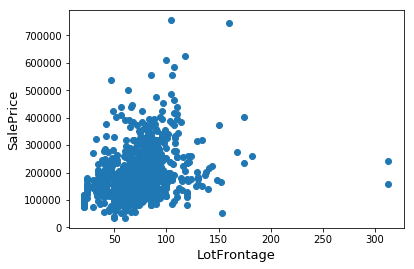

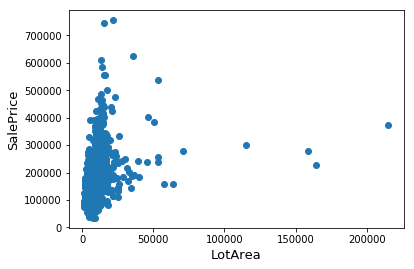

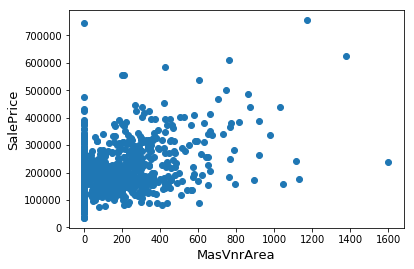

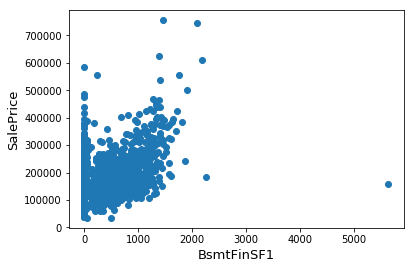

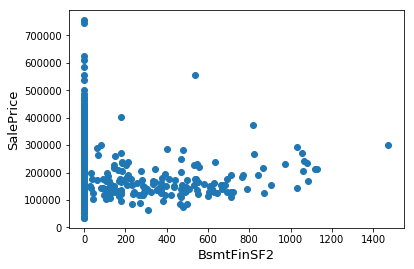

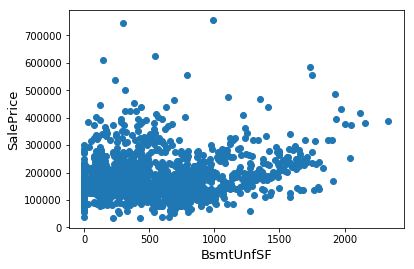

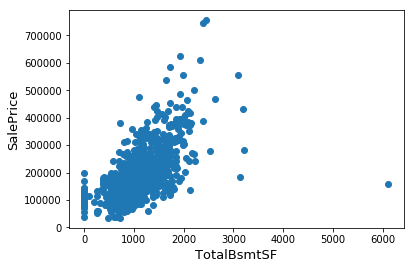

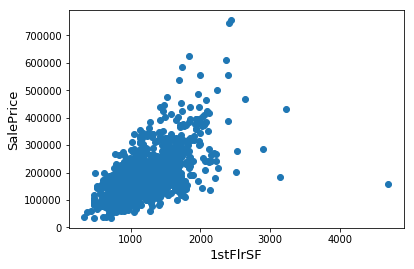

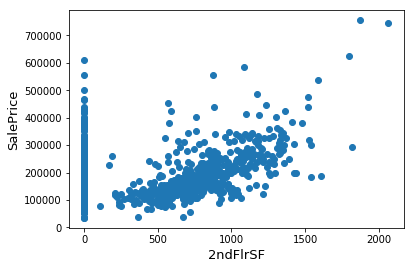

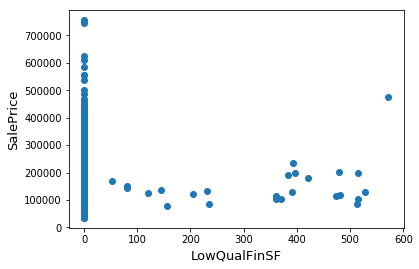

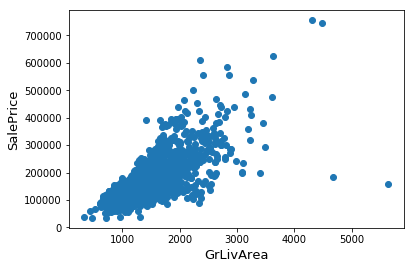

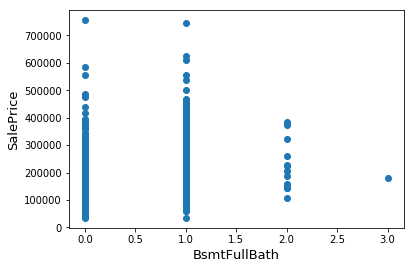

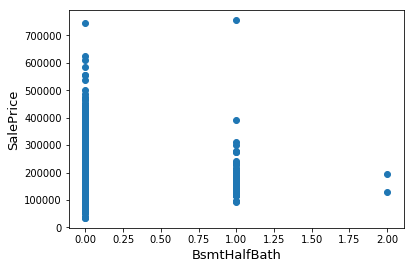

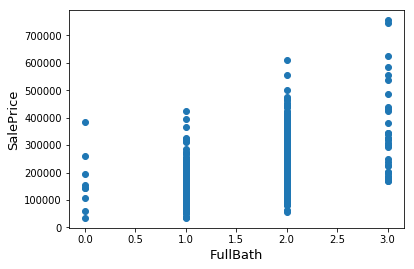

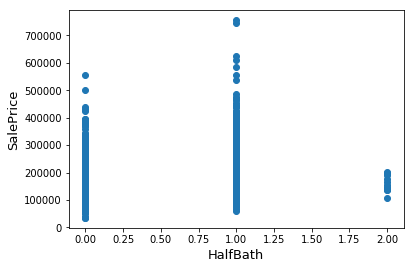

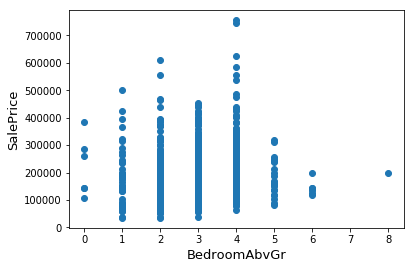

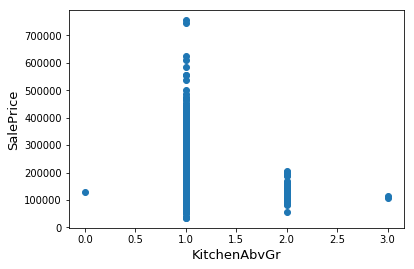

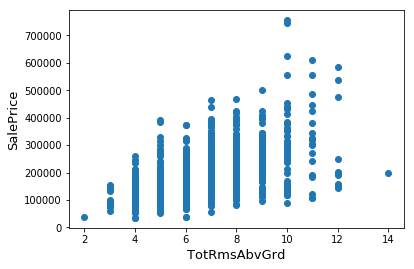

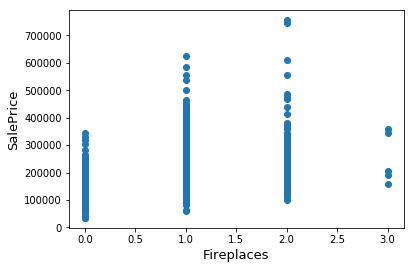

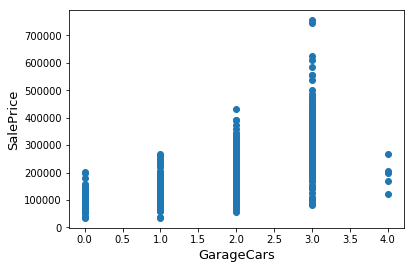

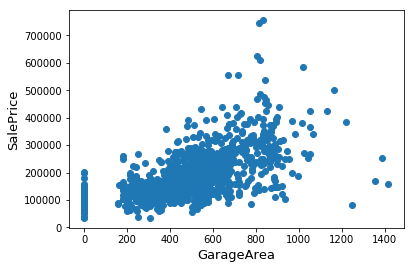

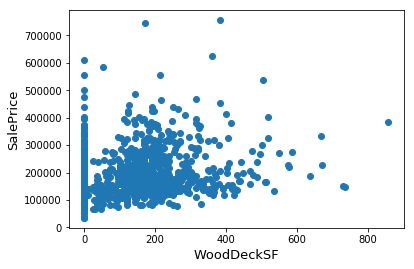

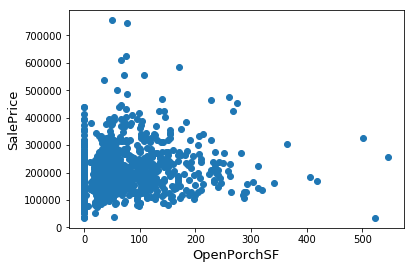

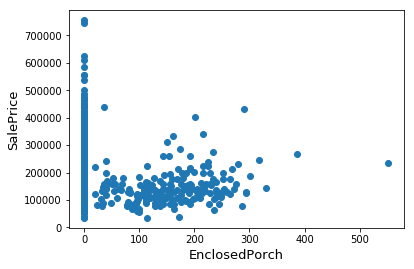

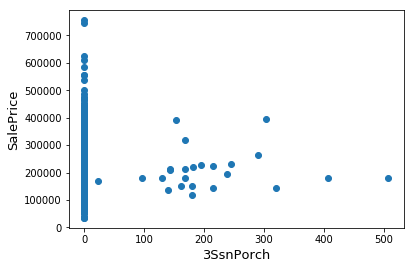

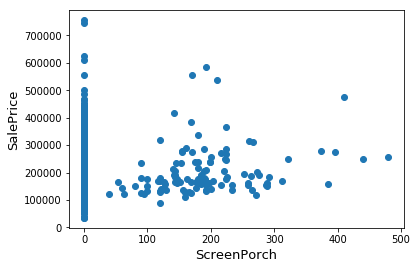

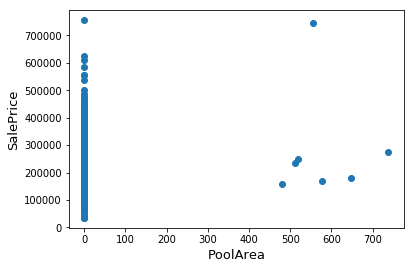

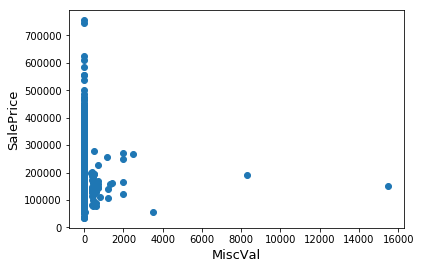

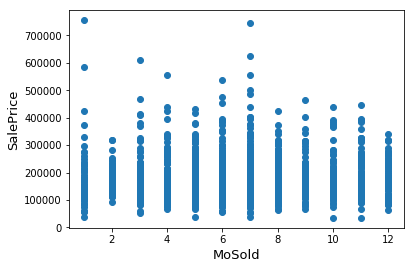

In [141]:
i=0
for i in range(len(contDF.columns)-1):
    find_outliers(contDF.iloc[:,i], contDF.SalePrice)

In [142]:
contDF.corr()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
LotFrontage,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.351799
LotArea,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843
MasVnrArea,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,0.477493
BsmtFinSF1,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.386420
BsmtFinSF2,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,...,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,0.214479
TotalBsmtSF,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,...,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,0.613581
1stFlrSF,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,...,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,0.605852
2ndFlrSF,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,...,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.035164,0.319334
LowQualFinSF,0.038469,0.004779,-0.069071,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,...,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.022174,-0.025606


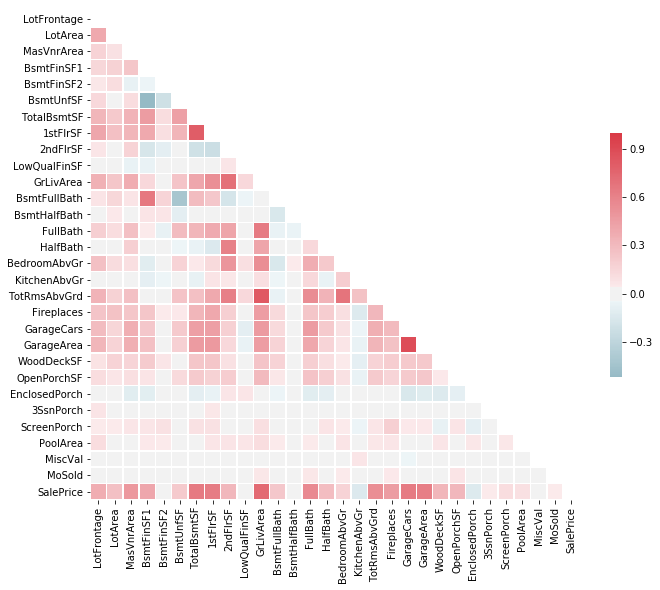

In [132]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

corr = contDF.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, vmax= 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Sale Price is strongly correlated with these continous variable, so we will eliminate outliers from these

Predictor : Correlation with Price
------------------------------------------------

GrLivArea :    0.708624

GarageCars : 0.640409

GarageArea:   0.623431

TotalBsmtSF : 0.613581 

1stFlrSF  :  0.605852

TotRmsAbvGrd :   0.533723

FullBath  :  0.560664  



Following are the two outliers which might effect out prediction

In [143]:
houseDF[(houseDF['GrLivArea']>4000) & (houseDF['SalePrice']<300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Dropping the outliers brought in by variable GrLivArea

In [144]:
houseDF = houseDF.drop(houseDF[(houseDF.GrLivArea>4000) & (houseDF.SalePrice<300000)].index)

houseDF.shape

(1458, 80)

Checking the plots after dropping the outlier

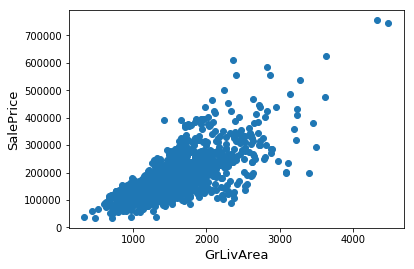

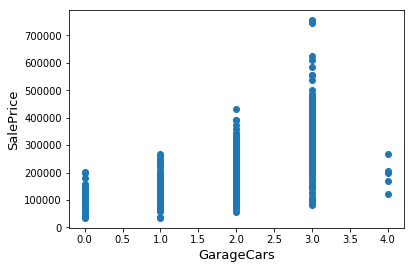

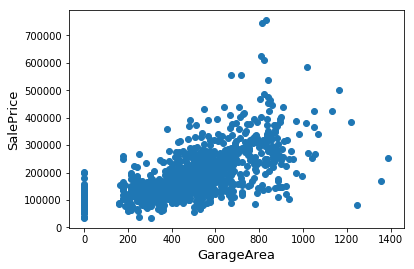

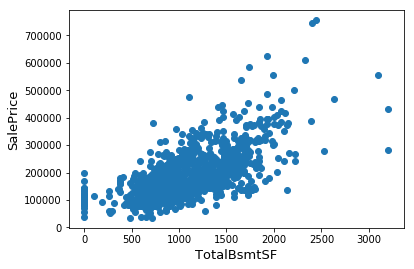

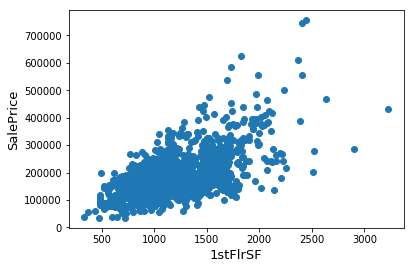

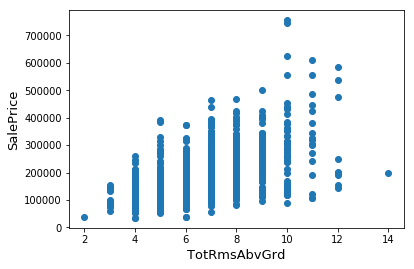

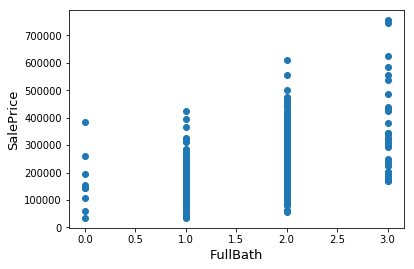

In [147]:
contDF = houseDF[[ 'LotFrontage', 'LotArea',  'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                  'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                   'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                   'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                   'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                   'MoSold', 'SalePrice']]

find_outliers(contDF.GrLivArea, contDF.SalePrice)
find_outliers(contDF.GarageCars, contDF.SalePrice)
find_outliers(contDF.GarageArea, contDF.SalePrice)
find_outliers(contDF.TotalBsmtSF, contDF.SalePrice)
find_outliers(contDF['1stFlrSF'], contDF.SalePrice)
find_outliers(contDF.TotRmsAbvGrd, contDF.SalePrice)
find_outliers(contDF.FullBath, contDF.SalePrice)


Following observation shows outlier brought in by Garage Area, its detached garage where GrLivArea is only 894 , year built = 1935 for which such a low sale Price $81000 makes sense, so we are not dropping this outlier

In [151]:
houseDF[(houseDF.GarageArea>1200) & (houseDF.SalePrice<100000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1994.0,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000


# Analysis of Target variable

We want to predict SalePrice. Let's check the distribution of target variable


 mu = 180921.20 and sigma = 79415.29



Text(0.5, 1.0, 'Distribution of Sale Price')

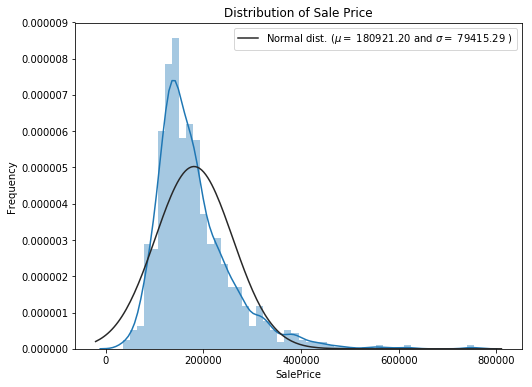

In [48]:
plt.figure(figsize = (8,6))

sns.distplot(houseDF.SalePrice, bins=50, fit= stats.norm);

# Get the fitted parameters used by the function
(mean, sd) = stats.norm.fit(houseDF.SalePrice)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mean, sd))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mean, sd)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')

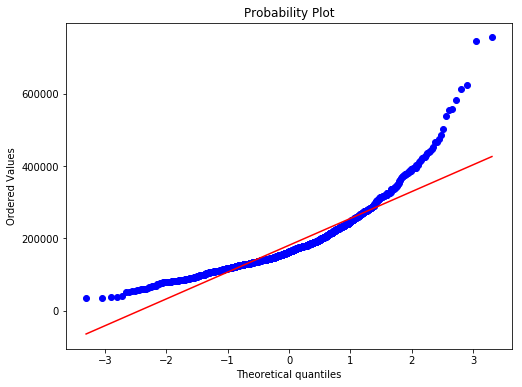

In [49]:
# Q Q plot
plt.figure(figsize = (8,6))
stats.probplot(houseDF.SalePrice, plot=plt)
plt.show()

The Sale price follows normal distribution but has a right skew. As the Q Q plot shows, its following the law of linearity but needs improvement. Let's check what it looks like after transformation

# Transformation of target variable


 mu = 12.02 and sigma = 0.40



Text(0.5, 1.0, 'Distribution of Sale Price')

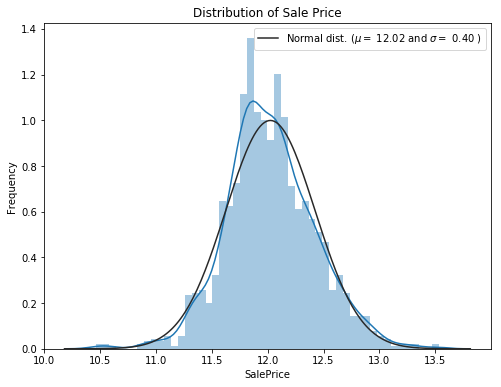

In [54]:
houseDF.SalePrice = np.log(houseDF.SalePrice)

plt.figure(figsize = (8,6))

sns.distplot(houseDF.SalePrice, bins=50, fit= stats.norm);

# Get the fitted parameters used by the function
(mean, sd) = stats.norm.fit(houseDF.SalePrice)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mean, sd))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mean, sd)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')



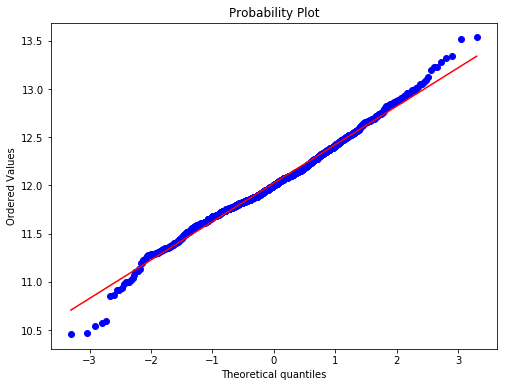

In [55]:

# Q Q plot
plt.figure(figsize = (8,6))
stats.probplot(houseDF.SalePrice, plot=plt)
plt.show()

As the plots shows log transforming the price gives better results, we will transform it back after prediction using np.exp